In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interp
## Classification Algorithms ##
from sklearn.neighbors import KNeighborsClassifier
## For building models ##
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
## For measuring performance ##
from sklearn import metrics
from sklearn.model_selection import cross_val_score
## Ignore warnings ##
import warnings
warnings.filterwarnings ('ignore')

In [ ]:
col_names=['class', 'lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s', 'by pass', 'extravasates', 'regeneration of','early uptake in','lym.nodes dimin','lym.nodes enlar','changes in lym.', 'defect in node', 'changes in node', 'changes in stru', 'special forms',
'dislocation of', 'exclusion of ','no. of nodes in']

In [ ]:
 df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/lymphography/lymphography.data",names=col_names)
print("Size of dataset:",df.shape)
df.head()

Size of dataset: (148, 19)


,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


<Axes: xlabel='lymphatics', ylabel='Density'>

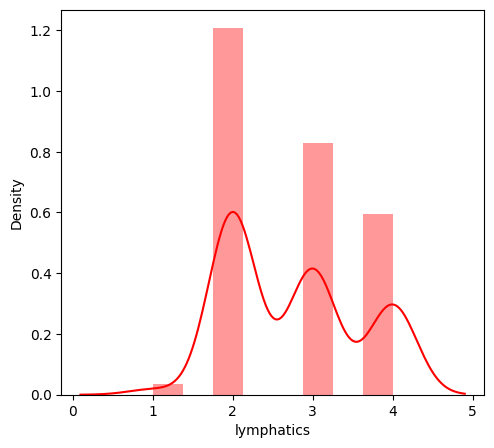

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['lymphatics'],color='r')

<Axes: xlabel='class', ylabel='Density'>

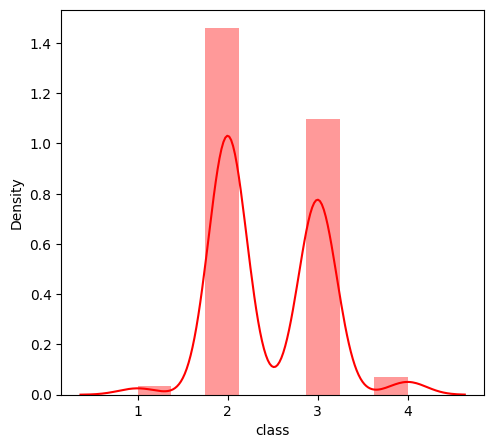

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['class'],color='r')

<Axes: xlabel='lymphatics', ylabel='count'>

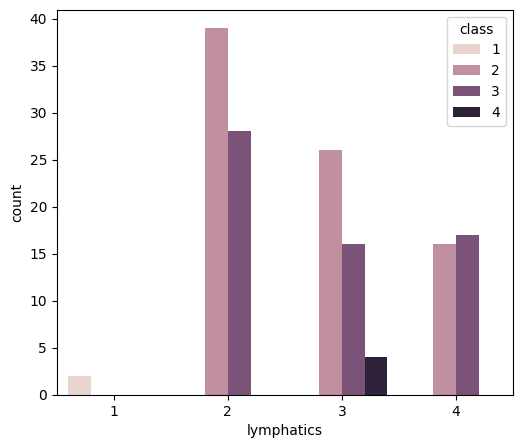

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x="lymphatics", hue='class', data=df)

In [ ]:
df.describe()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of,no. of nodes in
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   class            148 non-null    int64
 1   lymphatics       148 non-null    int64
 2   block of affere  148 non-null    int64
 3   bl. of lymph. c  148 non-null    int64
 4   bl. of lymph. s  148 non-null    int64
 5   by pass          148 non-null    int64
 6   extravasates     148 non-null    int64
 7   regeneration of  148 non-null    int64
 8   early uptake in  148 non-null    int64
 9   lym.nodes dimin  148 non-null    int64
 10  lym.nodes enlar  148 non-null    int64
 11  changes in lym.  148 non-null    int64
 12  defect in node   148 non-null    int64
 13  changes in node  148 non-null    int64
 14  changes in stru  148 non-null    int64
 15  special forms    148 non-null    int64
 16  dislocation of   148 non-null    int64
 17  exclusion of     148 non-null    int64
 18  no. of nod

In [ ]:
df.isnull().sum()

class              0
lymphatics         0
block of affere    0
bl. of lymph. c    0
bl. of lymph. s    0
by pass            0
extravasates       0
regeneration of    0
early uptake in    0
lym.nodes dimin    0
lym.nodes enlar    0
changes in lym.    0
defect in node     0
changes in node    0
changes in stru    0
special forms      0
dislocation of     0
exclusion of       0
no. of nodes in    0
dtype: int64

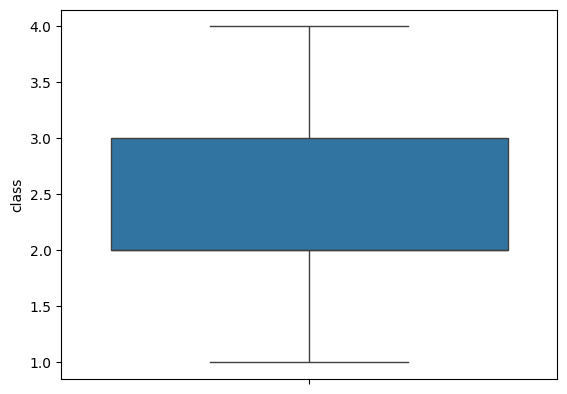

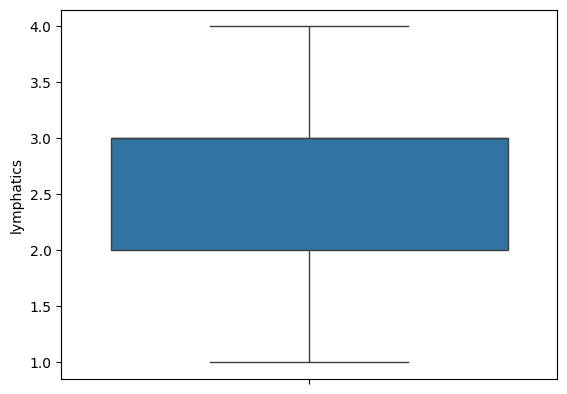

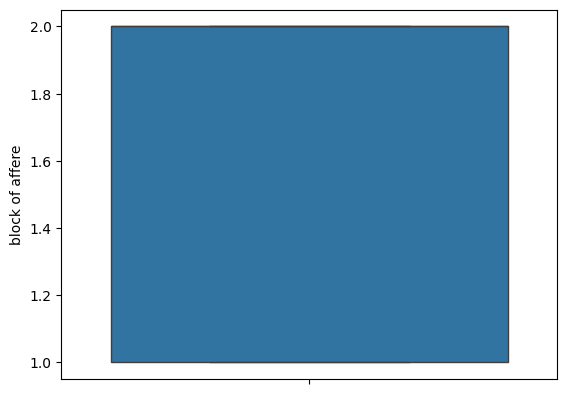

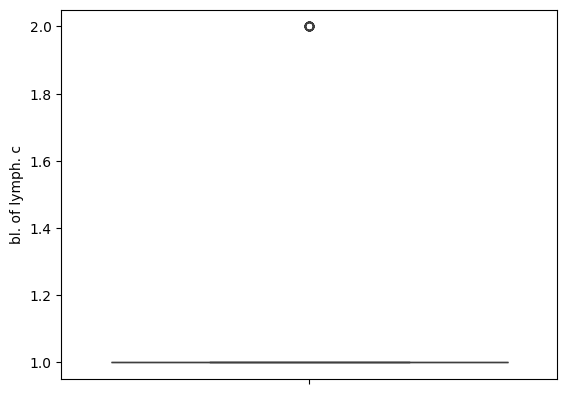

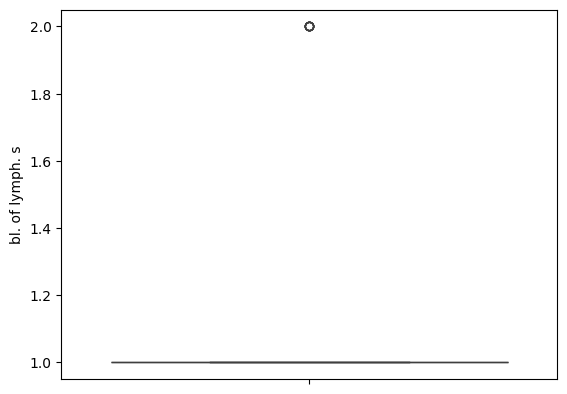

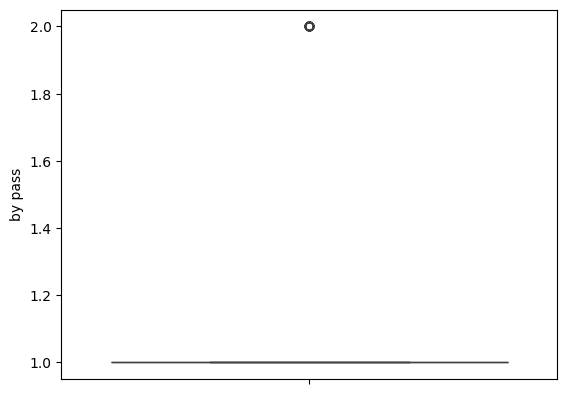

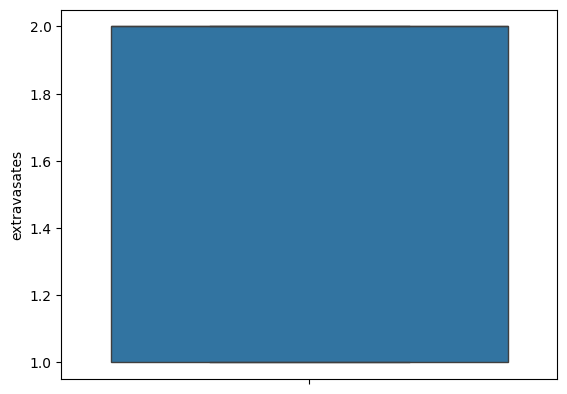

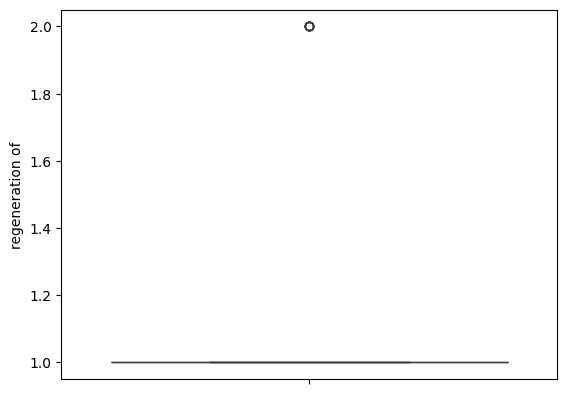

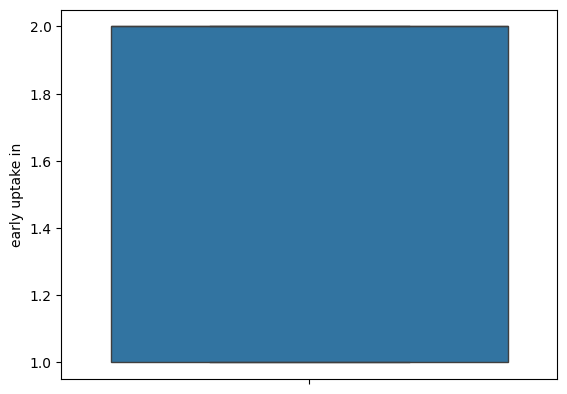

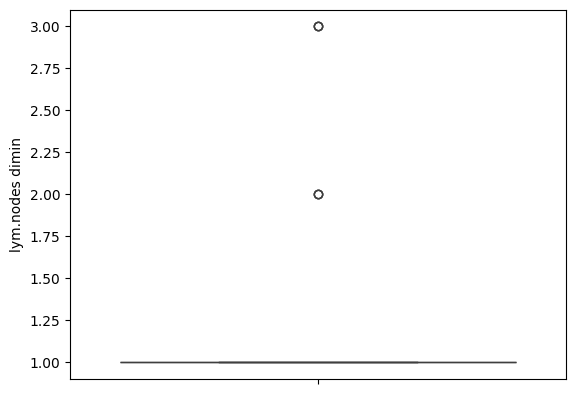

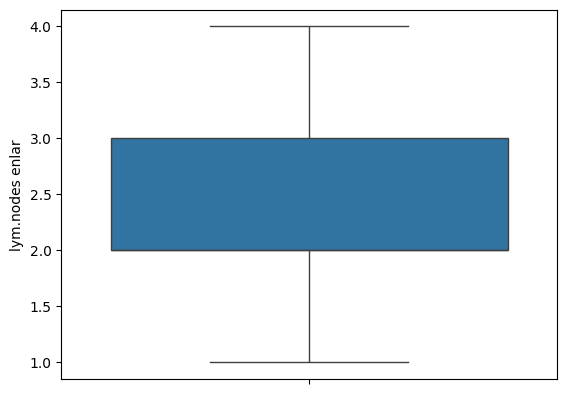

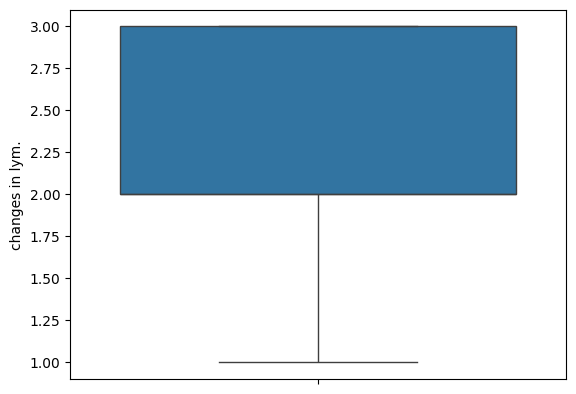

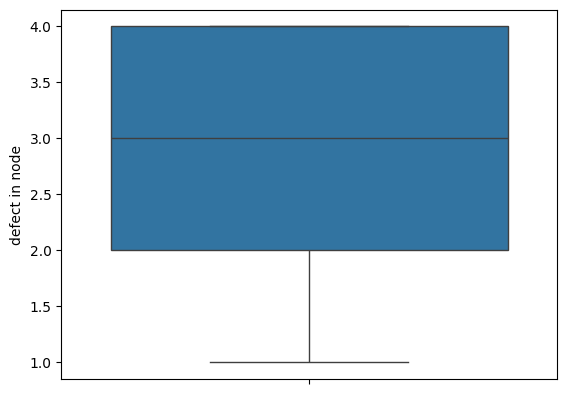

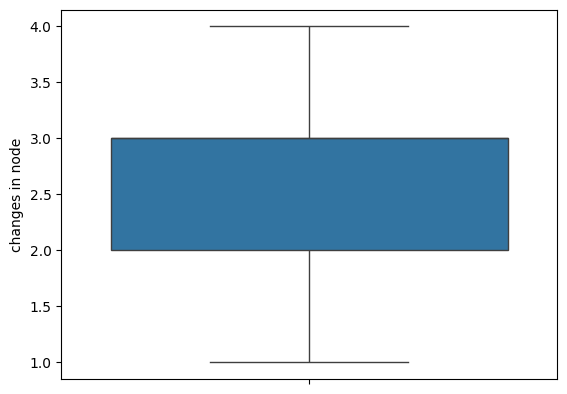

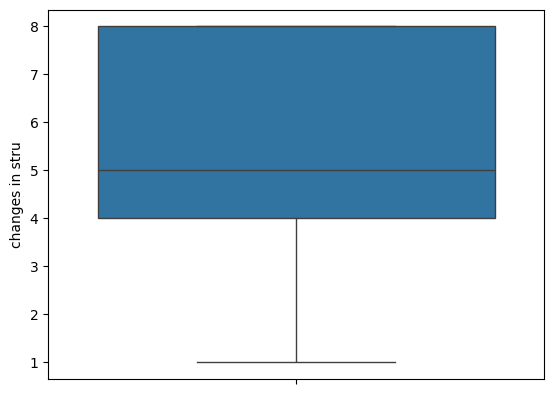

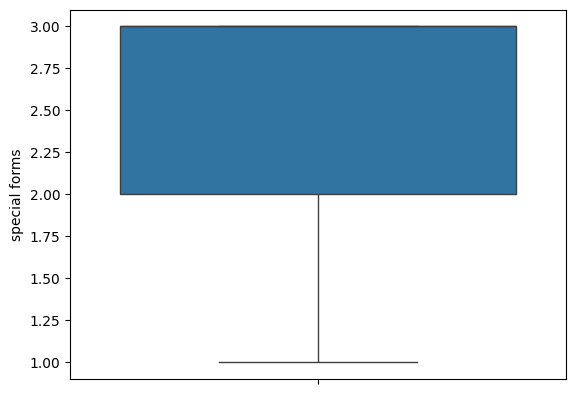

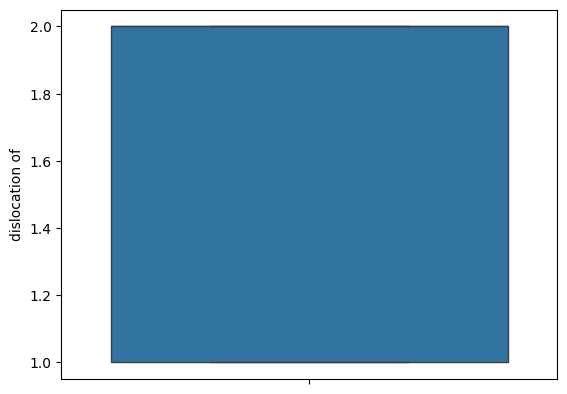

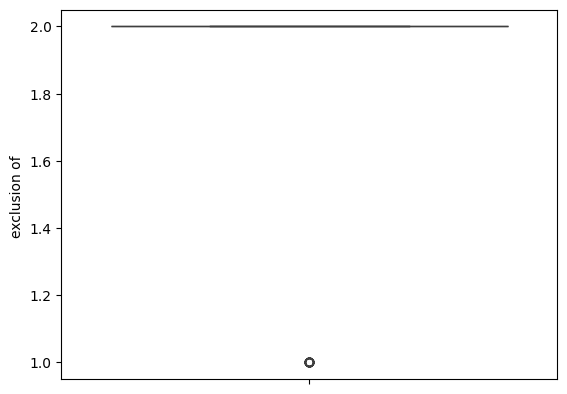

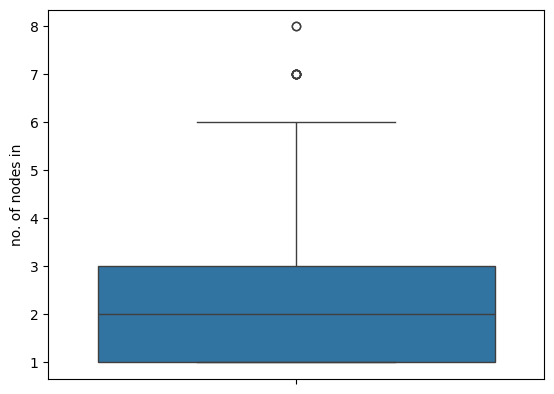

In [ ]:
for col in df.columns:
    sns.boxplot(df[col])
    print("")
    plt.show()

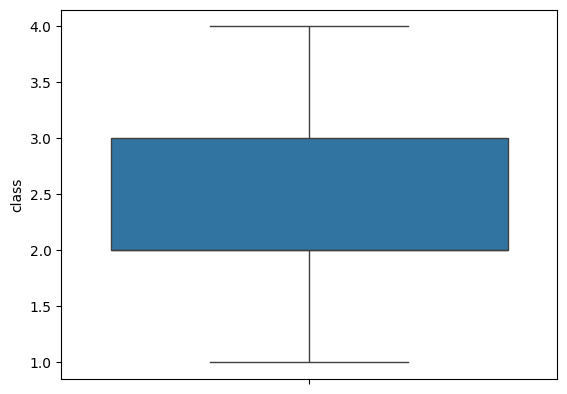

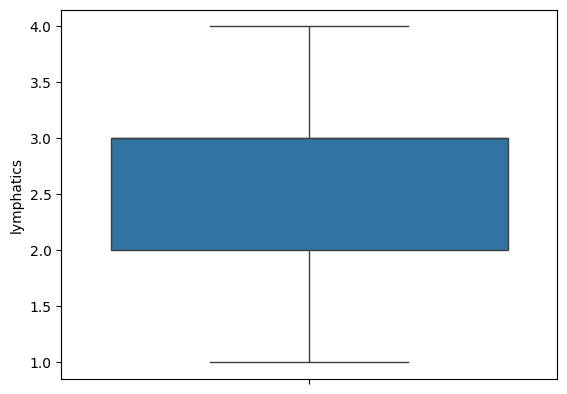

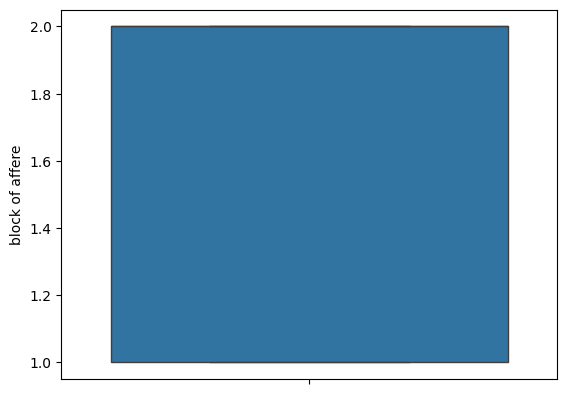

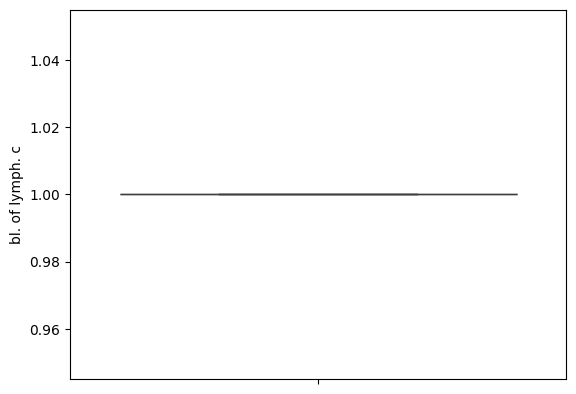

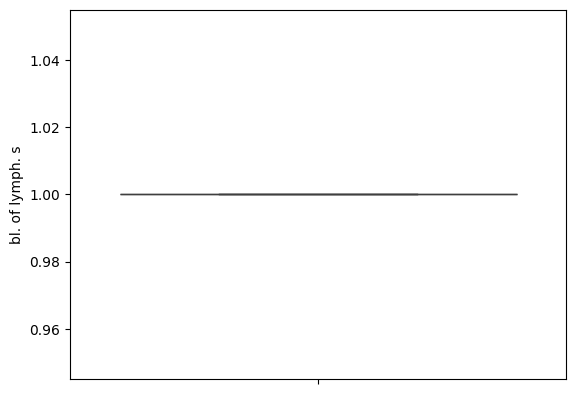

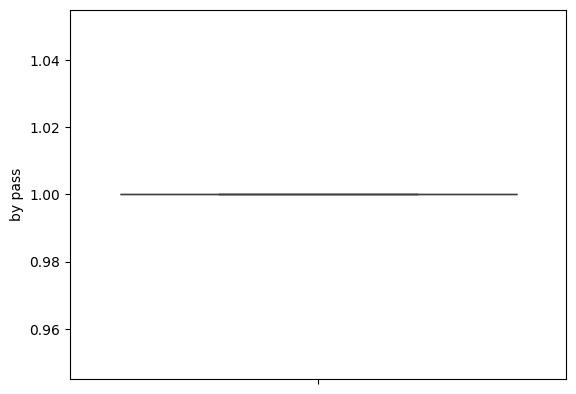

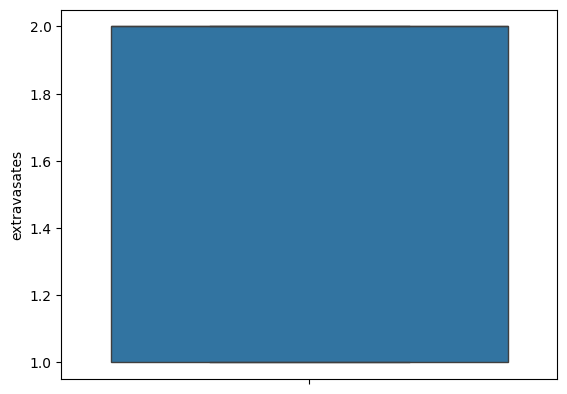

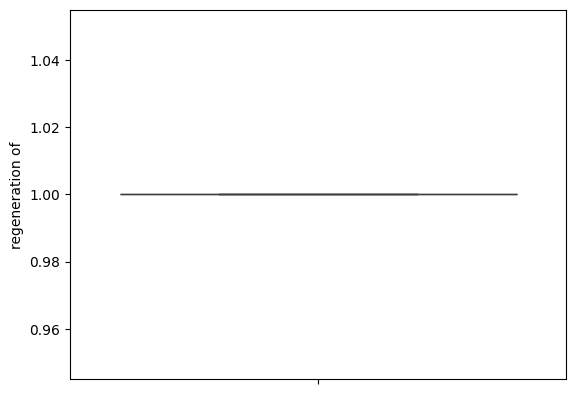

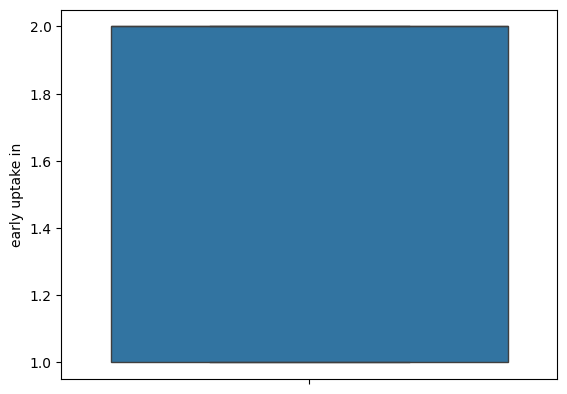

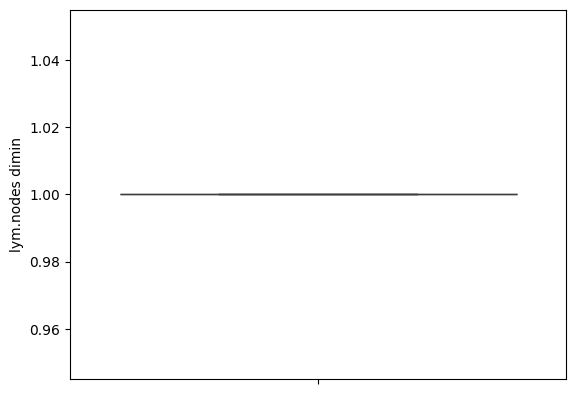

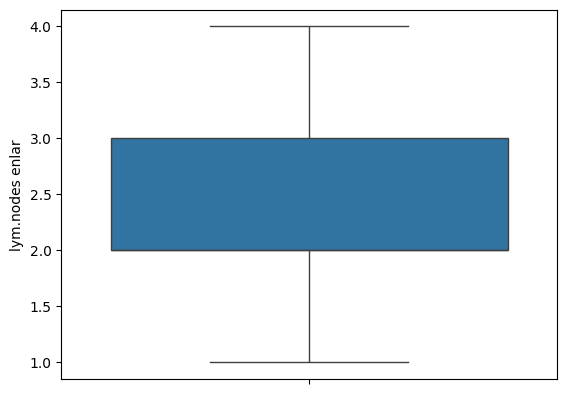

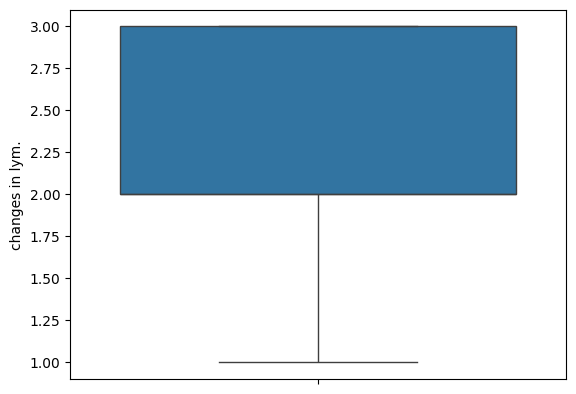

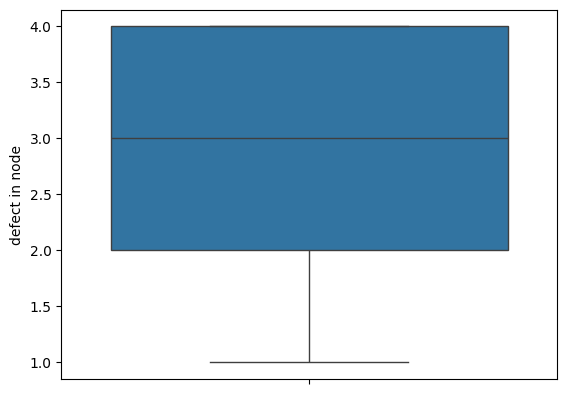

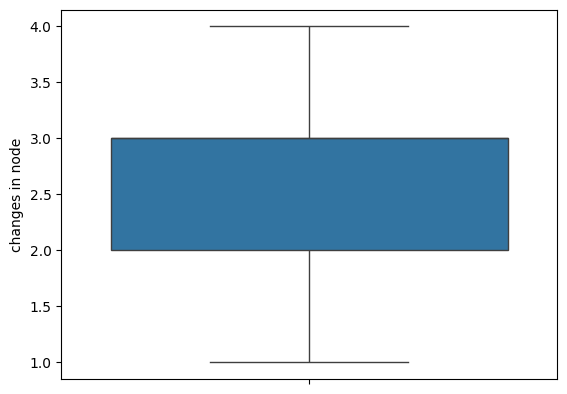

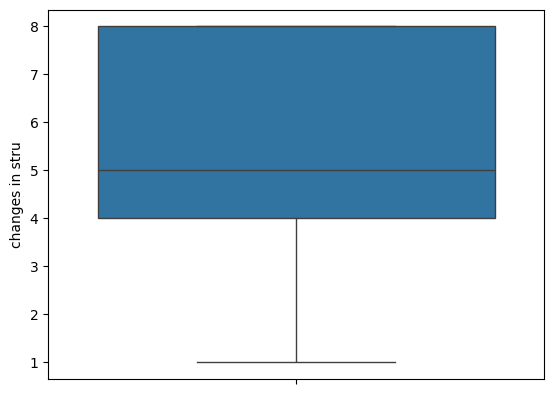

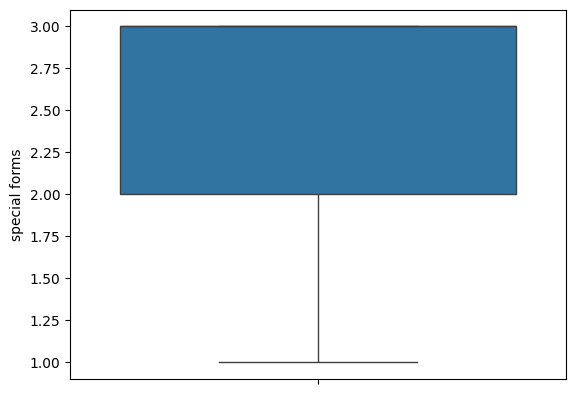

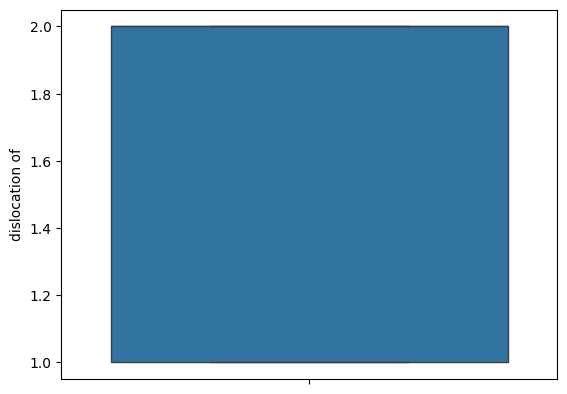

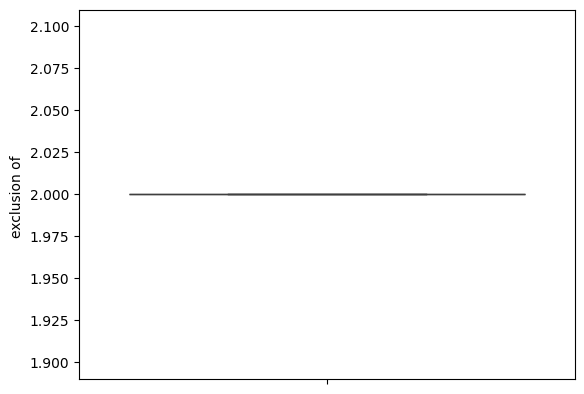

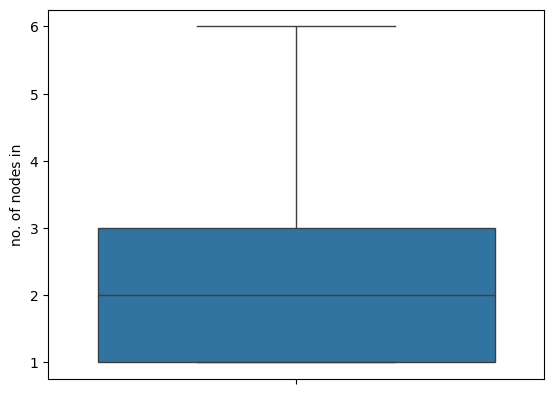

In [ ]:
for col in df.columns:
  q1 = np.quantile(df[col],0.25)
  q3 = np.quantile(df[col],0.75)
  iqr = q3-q1
  lower_bound = q1 - (1.5*iqr)
  upper_bound = q3 + (1.5*iqr)
  df[col] = np.where(df[col]> upper_bound,upper_bound,df[col])
  df[col] = np.where(df[col]< lower_bound,lower_bound,df[col])
  sns.boxplot(df[col])
  print("")
  plt.show()

In [ ]:
# Assuming 'class' is your target variable and the rest are features
y = df['class']  # Create y to hold your target variable
x = df.drop('class', axis=1)  # Create x to hold your features
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
###check shape to make sure it is all in order
print("size of x_train: {} \t size of x_test: {} \nsize of y_train:{} \t sixe of y_test: {}".format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

size of x_train: (118, 18) 	 size of x_test: (30, 18) 
size of y_train:(118,) 	 sixe of y_test: (30,)


In [ ]:
# You need to define best_k here.
# For example, if you determined the best k to be 5 in a previous analysis:
best_k = {"Regular ": 5}
## Instantiate the models
knn=KNeighborsClassifier(n_neighbors=best_k["Regular "])
## Fit the model to the training set
knn.fit(x_train,y_train)
KNeighborsClassifier(n_neighbors=9)
knn_pred=knn.predict(x_test)

In [ ]:
def confmatrix(y_pred, title):

    cm = metrics.confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    plt.title(title)
    import seaborn as sns

    sns.set(font_scale=1.4) # For label size
    sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 18})

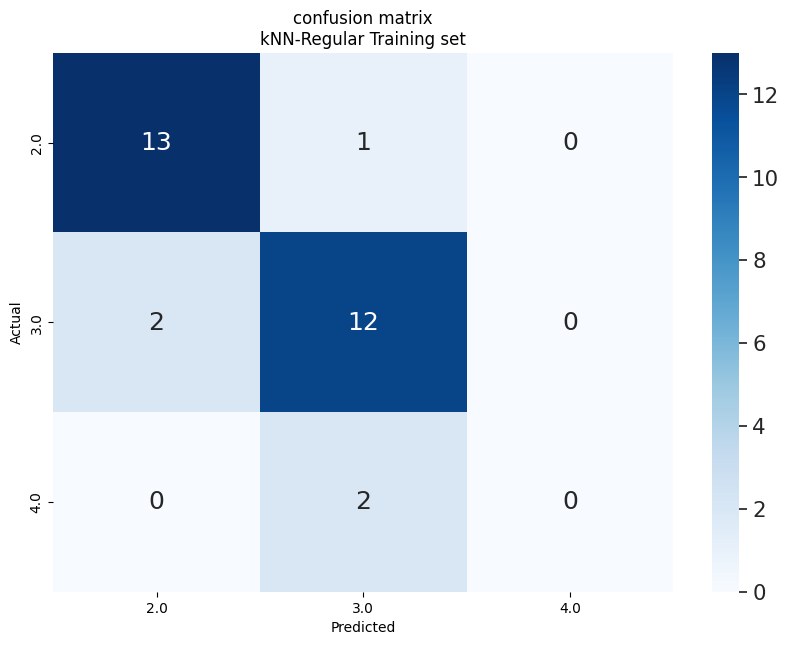

In [ ]:
confmatrix(knn_pred,"confusion matrix\nkNN-Regular Training set")

In [ ]:
best_k={"Regular":0}
best_score={"Regular":0}

for k in range(3, 50, 2):

    ## Using Regular training set
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(x_train, y_train)
    knn_temp_pred = knn_temp.predict(x_test)
    score = metrics.accuracy_score(y_test, knn_temp_pred) * 100 # Get accuracy
    if score >= best_score["Regular"] and score < 100:
        best_score["Regular"] = score
        best_k["Regular"] = k


### Print the best score and best k
print(" --- Results --- \nk: {}\nScore: {}".format(best_k, best_score))

 --- Results --- 
k: {'Regular': 5}
Score: {'Regular': 83.33333333333334}


In [ ]:
knn_pred1= knn.predict(x_train)
knn_score1 = metrics.accuracy_score(y_train, knn_pred1) * 100
print(knn_score1)

81.35593220338984


**KNN**

In [ ]:
knn_score1 = metrics.accuracy_score(y_train, knn_pred1) * 100
print(knn_score1)
knn_score = metrics.accuracy_score(y_test, knn_pred) * 100

### Print classification report for regular
print(" ----- Regular Training Set Used ----- ")
print("Classification report for {}:\n{}". format(knn, metrics.classification_report(y_test, knn_pred)))
print("Accuracy score:", knn_score)

81.35593220338984
 ----- Regular Training Set Used ----- 
Classification report for KNeighborsClassifier():
              precision    recall  f1-score   support

         2.0       0.87      0.93      0.90        14
         3.0       0.80      0.86      0.83        14
         4.0       0.00      0.00      0.00         2

    accuracy                           0.83        30
   macro avg       0.56      0.60      0.57        30
weighted avg       0.78      0.83      0.80        30

Accuracy score: 83.33333333333334


In [ ]:
def roccurve(X,y,classifier):
    y = label_binarize(y, classes=[1,2, 3, 4])
    n_classes = y.shape[1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    y_score = classifier.fit(x_train, y_train).predict(x_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _= roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _= roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    lw= 2
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1],color='k', linestyle='--',lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt. legend(loc="lower right")
    plt.show()

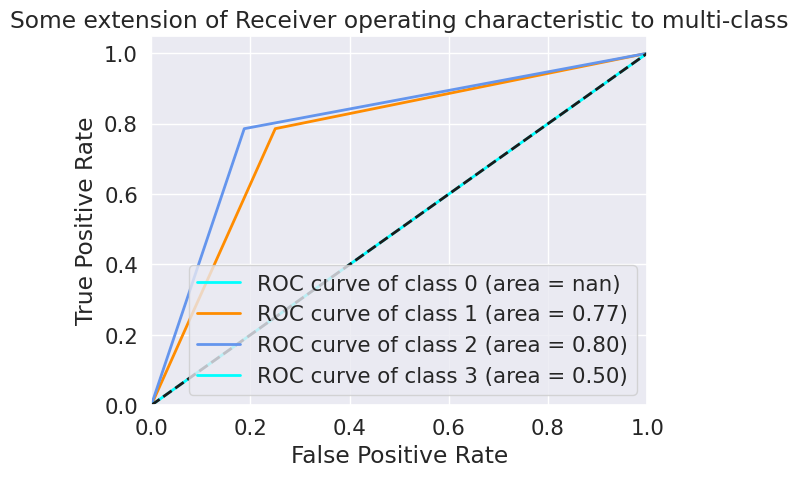

In [ ]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_auc_score
classifier = (KNeighborsClassifier(n_neighbors=9))
roccurve(x,y,classifier)

In [ ]:
import pickle
pickle.dump(knn,open("lymph.pkl",'wb'))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# Transform your data
scaled_data = scaler.fit_transform(x_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the classifier
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         2.0       0.74      1.00      0.85        14
         3.0       1.00      0.64      0.78        14
         4.0       1.00      1.00      1.00         2

    accuracy                           0.83        30
   macro avg       0.91      0.88      0.88        30
weighted avg       0.88      0.83      0.83        30



In [ ]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 5,  9,  0],
       [ 0,  0,  2]])

In [ ]:
df.head()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of,no. of nodes in
0,3.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,4.0,8.0,1.0,1.0,2.0,2.0
1,2.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,3.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0
2,3.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,4.0,3.0,3.0,4.0,8.0,3.0,2.0,2.0,6.0
3,3.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,3.0,4.0,4.0,4.0,3.0,1.0,2.0,6.0
4,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,3.0,5.0,1.0,2.0,2.0,1.0


In [ ]:
clf.predict([[4.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,4.0,8.0,1.0,1.0,2.0,2.0]])

array([3.])

In [ ]:
df.iloc[2]

class              3.0
lymphatics         3.0
block of affere    2.0
bl. of lymph. c    1.0
bl. of lymph. s    1.0
by pass            1.0
extravasates       2.0
regeneration of    1.0
early uptake in    2.0
lym.nodes dimin    1.0
lym.nodes enlar    4.0
changes in lym.    3.0
defect in node     3.0
changes in node    4.0
changes in stru    8.0
special forms      3.0
dislocation of     2.0
exclusion of       2.0
no. of nodes in    6.0
Name: 2, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
lr_pred_test=model_lr.predict(x_test)
lr_pred_train=model_lr.predict(x_train)
test_acc_lr=accuracy_score(y_test,lr_pred_test)
train_acc_lr=accuracy_score(y_train,lr_pred_train)
print('Logistic Regression test accuracy: ',test_acc_lr)
print(classification_report(y_test,lr_pred_test))

Logistic Regression test accuracy:  0.8
              precision    recall  f1-score   support

         2.0       0.71      1.00      0.83        12
         3.0       1.00      0.71      0.83        17
         4.0       0.00      0.00      0.00         1

    accuracy                           0.80        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.85      0.80      0.80        30



In [ ]:
confusion_matrix(y_test,lr_pred_test)

array([[12,  0,  0],
       [ 4, 12,  1],
       [ 1,  0,  0]])

In [ ]:
model_lr.predict([[4.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,4.0,8.0,1.0,1.0,2.0,2.0]])

array([2.])

SVM

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(x_train,y_train)
svm_pred_test=model_svm.predict(x_test)
svm_pred_train=model_svm.predict(x_train)
test_acc_svm=accuracy_score(y_test,svm_pred_test)
train_acc_svm=accuracy_score(y_train,svm_pred_train)
print('SVM Test Accuracy: ',test_acc_svm)
print(classification_report(y_test,svm_pred_test))

SVM Test Accuracy:  0.8
              precision    recall  f1-score   support

         2.0       0.73      0.92      0.81        12
         3.0       0.87      0.76      0.81        17
         4.0       0.00      0.00      0.00         1

    accuracy                           0.80        30
   macro avg       0.53      0.56      0.54        30
weighted avg       0.78      0.80      0.79        30



In [ ]:
confusion_matrix(y_test,svm_pred_test)

array([[11,  1,  0],
       [ 4, 13,  0],
       [ 0,  1,  0]])

In [ ]:
model_svm.predict([[4.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,4.0,8.0,1.0,1.0,2.0,2.0]])

array([2.])

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
GBC_pred_test=GBC.predict(x_test)
GBC_pred_train=GBC.predict(x_train)
GBC_test_acc=accuracy_score(y_test,GBC_pred_test)
GBC_train_acc=accuracy_score(y_train,GBC_pred_train)
print('GB accuracy is: ',GBC_test_acc)
print(classification_report(y_test,GBC_pred_test))

GB accuracy is:  0.8333333333333334
              precision    recall  f1-score   support

         2.0       0.73      0.92      0.81        12
         3.0       0.93      0.82      0.87        17
         4.0       0.00      0.00      0.00         1

    accuracy                           0.83        30
   macro avg       0.56      0.58      0.56        30
weighted avg       0.82      0.83      0.82        30



In [ ]:
GBC.predict([[4.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,4.0,8.0,1.0,1.0,2.0,2.0]])

array([3.])

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred_test=knn.predict(x_test)
knn_pred_train=knn.predict(x_train)
test_acc_knn=accuracy_score(y_test,knn_pred_test)
train_acc_knn=accuracy_score(y_train,knn_pred_train)
print('KNN Test Accuracy is: ',test_acc_knn)
print(classification_report(y_test,knn_pred_test))

KNN Test Accuracy is:  0.7666666666666667
              precision    recall  f1-score   support

         2.0       0.69      0.92      0.79        12
         3.0       0.86      0.71      0.77        17
         4.0       0.00      0.00      0.00         1

    accuracy                           0.77        30
   macro avg       0.51      0.54      0.52        30
weighted avg       0.76      0.77      0.75        30



In [ ]:
confusion_matrix(y_test,knn_pred_test)

array([[11,  1,  0],
       [ 5, 12,  0],
       [ 0,  1,  0]])

In [ ]:
knn.predict([[4.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,4.0,8.0,1.0,1.0,2.0,2.0]])

array([2.])

Testing the Model

In [ ]:
df.tail()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of,no. of nodes in
143,3.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,4.0,3.0,5.0,2.0,2.0,2.0,4.0
144,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,1.0
145,3.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,3.0,3.0,3.0,8.0,3.0,2.0,2.0,4.0
146,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0
147,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,6.0


In [ ]:
model_lr.predict([[2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,6.0]])

array([3.])

compariing the models using different evaluation metrics

In [ ]:
model_names=['Decision tree classifier','Logistic Regression','SVM','Gradient Boosting','KNN']

In [ ]:
y_pred_tests=[y_pred,lr_pred_test,svm_pred_test,GBC_pred_test,knn_pred_test]

In [ ]:
results_df=pd.DataFrame(columns=['Model','Test Accuracy','Precision','Recall','F1-score'])

In [ ]:
results_df = pd.DataFrame(columns=['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1-score'])

for i, model_name in enumerate(model_names):
    y_pred_test = y_pred_tests[i]

    test_acc = accuracy_score(y_test, y_pred_test)
    classification = classification_report(y_test, y_pred_test, output_dict=True)
    precision = classification['macro avg']['precision']
    recall = classification['macro avg']['recall']
    f1_score = classification['macro avg']['f1-score']

    # Use .loc to add a new row to the DataFrame
    results_df.loc[len(results_df.index)] = {
        'Model': model_name,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1_score
    }

# Displaying results in table-like format
print(results_df.to_string(index=False))

                   Model  Test Accuracy  Precision   Recall  F1-score
Decision tree classifier       0.333333   0.253411 0.245098  0.231596
     Logistic Regression       0.800000   0.568627 0.568627  0.551724
                     SVM       0.800000   0.533333 0.560458  0.542438
       Gradient Boosting       0.833333   0.555556 0.580065  0.563272
                     KNN       0.766667   0.514881 0.540850  0.519969
